#### Introduction

The cost of employee attrition (departure of employees from company) is a major expense for businesses all around the world. Attrition costs include Lost productivity, lost employee knowledge, and the costs associated with sourcing and training a replacement. Utilising a dataset with information about employees' compensation packages, job role and satisfaction, and various other metrics, we will derive insights that may aid in the reduction of employee attrition, and thus overall expenses of the business.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading file

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Looking at unique values

In [4]:
df.apply(lambda x: x.unique())

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

#### Checking for null / missing values

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<br> <br>

### Data Visualisation & Analysis

#### Attrition

Text(0, 0.5, 'Number of Employees')

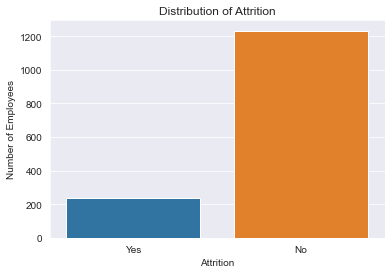

In [6]:
sns.set_style('darkgrid')
sns.countplot(data = df, x = 'Attrition')
plt.title('Distribution of Attrition')
plt.ylabel('Number of Employees')

In [7]:
counts = df['Attrition'].value_counts()
counts = counts / len(df['Attrition']) * 100
counts

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

83.88% of employees are still at company, 16.12% of employees have left company.

<br><br>

#### The age distribution of employees, and its impact on attrition

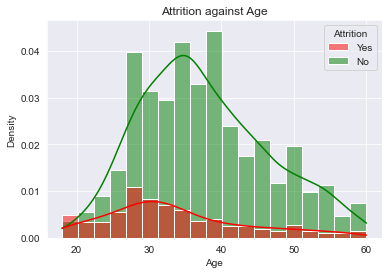

In [8]:
sns.histplot(data = df, x = 'Age', hue ='Attrition', kde = 'True', palette = {'Yes': 'red', 'No': 'green'}, stat = 'density')
plt.title('Attrition against Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

The distribution of 'No' just shows the distribution of the company workforce, with the majority of employees aged 30-40. For 'Yes', we can see that the majority of employee exits occur when employees are 25-35, and for those older, attrition is stable.

<br><br>

#### The impact of Salary & compensaton packages on Attrition

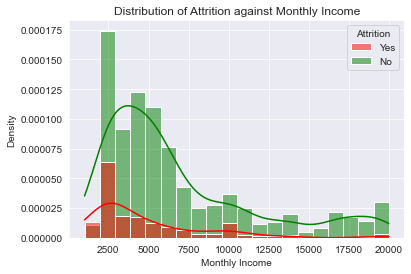

In [9]:
sns.histplot(data= df, x= "MonthlyIncome", hue= "Attrition", stat = 'density', kde = 'True', palette = {'Yes': 'red', 'No': 'green'})
plt.title("Distribution of Attrition against Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.show()

It is observed that the majority of employees are at a monthly income of around 5000. This may also explain the larger proportion of employees quitting at around the 2500 to 5000 Income mark. Besides that, employee attrition is fairly stable, with no other abnormalities.

Text(0.5, 1.0, 'Attrition for each Stock Option Level')

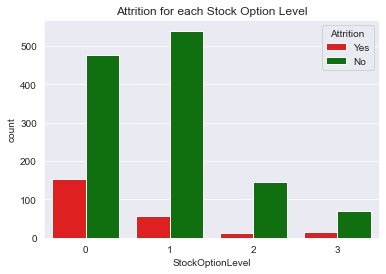

In [10]:
sns.countplot(data = df, x = 'StockOptionLevel', hue = 'Attrition', palette = {'Yes': 'red', 'No': 'green'})
plt.title('Attrition for each Stock Option Level')

In [11]:
stock = df.groupby(['StockOptionLevel', 'Attrition']).size().reset_index(name = 'Count')
stock_totals = df.groupby('StockOptionLevel').size()
stock["Attrition percentage for each Stock Level"] = stock.apply(lambda row: (row["Count"] / stock_totals[row["StockOptionLevel"]]) * 100, axis=1)
stock = stock[stock['Attrition'] == 'Yes']
stock = stock.sort_values(by = 'Attrition percentage for each Stock Level', ascending = False)
stock = stock.style.hide(axis ='index')
stock

AttributeError: 'Styler' object has no attribute 'hide'

We now analyse the inclusion of stock options and its impact on employee attrition. Those with no stock options have noticably higher attrition compared to those who receive any stock option from the company. Between the employees who receive any stock at all, those who receive the highest stock level have the highest attrition, followed by levels 1 & 2.

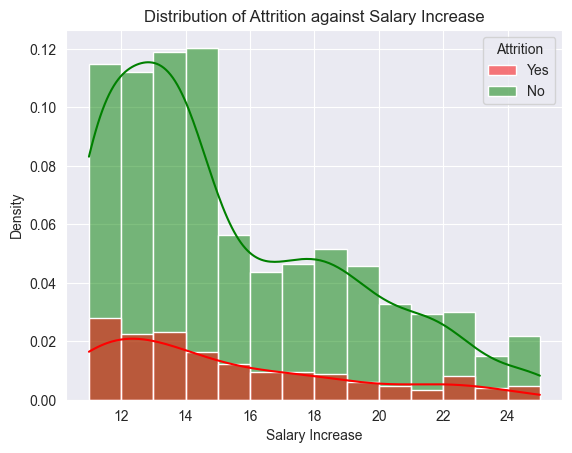

In [ ]:
sns.histplot(data= df, x= "PercentSalaryHike", hue= "Attrition", stat = 'density', kde = 'True', palette = {'Yes': 'red', 'No': 'green'})
plt.title("Distribution of Attrition against Salary Increase")
plt.xlabel("Salary Increase")
plt.ylabel("Density")
plt.show()

As the salary increase rises, attrition steadily decreases.

<br><br>

#### The impact of Departments, Job Roles and Satisfaction on Attrition

Text(0.5, 1.0, 'Attrition for each Department')

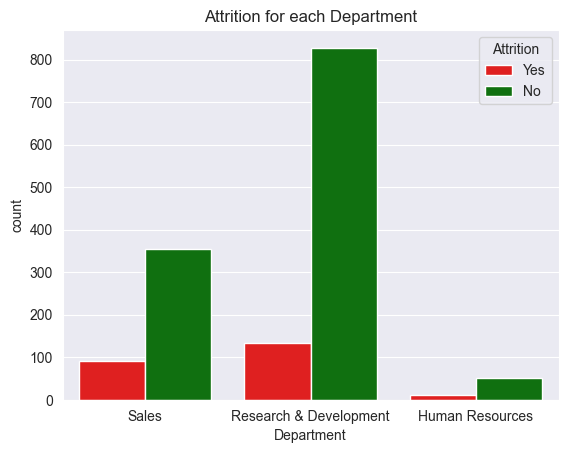

In [ ]:
sns.countplot(data = df, x = 'Department', hue = 'Attrition', palette = {'Yes': 'red', 'No': 'green'})
plt.title('Attrition for each Department')

In [ ]:
departments = df.groupby(['Department', 'Attrition']).size().reset_index(name = 'Count')
department_totals = df.groupby('Department').size()
departments["Percentage of Department"] = departments.apply(lambda row: (row["Count"] / department_totals[row["Department"]]) * 100, axis=1)
departments.style.hide(axis ='index')

Department,Attrition,Count,Percentage of Department
Human Resources,No,51,80.952381
Human Resources,Yes,12,19.047619
Research & Development,No,828,86.160250
Research & Development,Yes,133,13.839750
Sales,No,354,79.372197
Sales,Yes,92,20.627803


The Research and Development department has the largest number of employees, followed by the Sales department, and then Human Resources. When only comparing departments, Research and Development has a lower attrition rate compared to Sales and Human Resources. This could signal for a focus on the Sales and Human Resources departments and further investigation to understand reasons and causes, and would lead to potentially the most drastic improvement for employee retention.

Text(0.5, 1.0, 'Attrition for each Role')

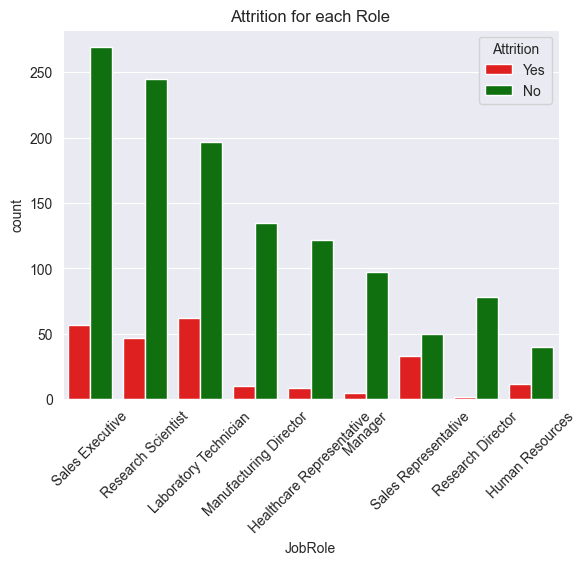

In [ ]:

sns.countplot(data = df, x = 'JobRole', hue = 'Attrition', palette = {'Yes': 'red', 'No': 'green'})
plt.xticks(rotation = 45)
plt.title('Attrition for each Role')

In [ ]:
role = df.groupby(['JobRole', 'Attrition']).size().reset_index(name = 'Count')
role_totals = df.groupby('JobRole').size()
role["Attrition percentage for each Role"] = role.apply(lambda row: (row["Count"] / role_totals[row["JobRole"]]) * 100, axis=1)
role = role[role['Attrition'] == 'Yes']
role = role.sort_values(by = 'Attrition percentage for each Role', ascending = False)
role = role.style.hide(axis ='index')
role

JobRole,Attrition,Count,Attrition percentage for each Role
Sales Representative,Yes,33,39.759036
Laboratory Technician,Yes,62,23.938224
Human Resources,Yes,12,23.076923
Sales Executive,Yes,57,17.484663
Research Scientist,Yes,47,16.095890
Manufacturing Director,Yes,10,6.896552
Healthcare Representative,Yes,9,6.870229
Manager,Yes,5,4.901961
Research Director,Yes,2,2.500000


Using the Job Role data, we can calculate the attrition level for each Job Role. There is a distinct difference in attrition levels between the various job roles that exist. We can see that Sales Representatives have a considerably higher attrition rate compared to other Job Roles, along with other roles typically assigned to the Human Resources and Research & Development departments. Managing directors and more senior figures have lower attrition levels, with the exception of the Sales Executive, who for a senior figure has a higher attrition rate compared to the other senior positions.

Text(0.5, 1.0, 'Attrition for each Job Satisfaction Rating')

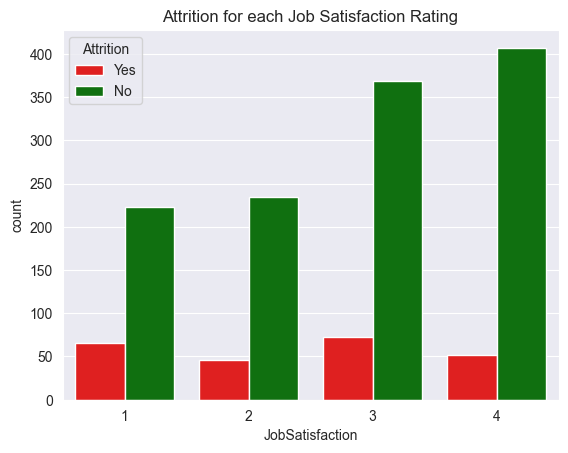

In [ ]:
sns.countplot(data = df, x = 'JobSatisfaction', hue = 'Attrition', palette = {'Yes': 'red', 'No': 'green'})
plt.title('Attrition for each Job Satisfaction Rating')

In [ ]:
satisfaction = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name = 'Count')
satisfaction_totals = df.groupby('JobSatisfaction').size()
satisfaction["Attriton percentage for each of Satisfaction level"] = satisfaction.apply(lambda row: (row["Count"] / satisfaction_totals[row["JobSatisfaction"]]) * 100, axis=1)
satisfaction.style.hide(axis ='index')

JobSatisfaction,Attrition,Count,Attriton percentage for each of Satisfaction level
1,No,223,77.162630
1,Yes,66,22.837370
2,No,234,83.571429
2,Yes,46,16.428571
3,No,369,83.484163
3,Yes,73,16.515837
4,No,407,88.671024
4,Yes,52,11.328976


From the data, it can be observed that there is a relationship between Job Satisfaction and attrition. As job satisfaction increases, the attrition level steadily decreases, with the lowest attrition at the highest Job Satisfaction level. Measures to improve job satisfaction could be taken to address attrition.

Text(0.5, 1.0, 'Attrition against Years since last Promotion')

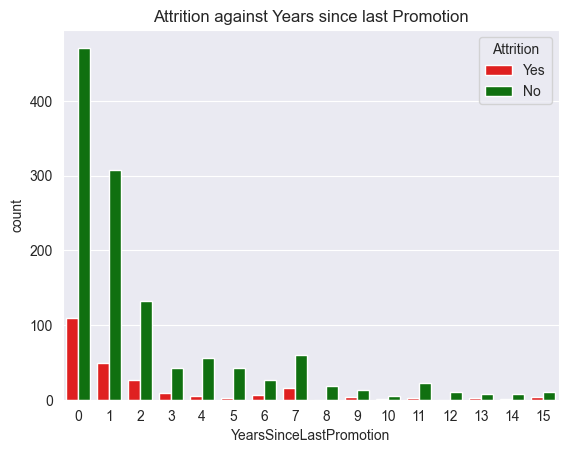

In [ ]:
sns.countplot(data = df, x = 'YearsSinceLastPromotion', hue = 'Attrition', palette = {'Yes': 'red', 'No': 'green'})
plt.title('Attrition against Years since last Promotion')

In [ ]:
promotion = df.groupby(['YearsSinceLastPromotion', 'Attrition']).size().reset_index(name = 'Count')
promotion_totals = df.groupby('YearsSinceLastPromotion').size()
promotion["Attrition percentage for each Year since Promotion"] = promotion.apply(lambda row: (row["Count"] / promotion_totals[row["YearsSinceLastPromotion"]]) * 100, axis=1)
promotion = promotion[promotion['Attrition'] == 'Yes']
promotion = promotion.style.hide(axis ='index')
promotion

YearsSinceLastPromotion,Attrition,Count,Attrition percentage for each Year since Promotion
0,Yes,110,18.932874
1,Yes,49,13.725490
2,Yes,27,16.981132
3,Yes,9,17.307692
4,Yes,5,8.196721
5,Yes,2,4.444444
6,Yes,6,18.750000
7,Yes,16,21.052632
9,Yes,4,23.529412
10,Yes,1,16.666667


There does not seem to be a visible relationship and pattern that can be concluded from just observing years since last promotion against attrition.

<br><br>

#### The impact of Work Life Balance & Overtime on Attrition

Text(0.5, 0, 'Work-Life Balance Rating')

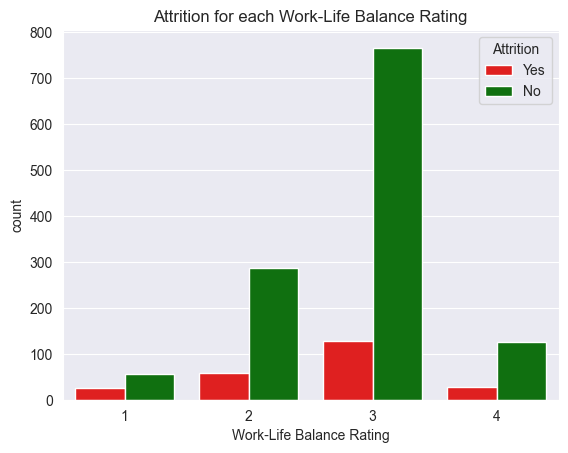

In [ ]:
sns.countplot(data = df, x = 'WorkLifeBalance', hue = 'Attrition', palette = {'Yes': 'red', 'No': 'green'})
plt.title('Attrition for each Work-Life Balance Rating')
plt.xlabel('Work-Life Balance Rating')

In [ ]:
balance = df.groupby(['WorkLifeBalance', 'Attrition']).size().reset_index(name = 'Count')
balance_totals = df.groupby('WorkLifeBalance').size()
balance["Attrition percentage for each Work-Life Balance Rating"] = balance.apply(lambda row: (row["Count"] / balance_totals[row["WorkLifeBalance"]]) * 100, axis=1)
balance = balance[balance['Attrition'] == 'Yes']
balance = balance.sort_values(by = 'Attrition percentage for each Work-Life Balance Rating', ascending = False)
balance = balance.style.hide(axis ='index')
balance

WorkLifeBalance,Attrition,Count,Attrition percentage for each Work-Life Balance Rating
1,Yes,25,31.250000
4,Yes,27,17.647059
2,Yes,58,16.860465
3,Yes,127,14.221725


There is a drastic difference in attrition between the employees who have rated work life balance differently, as employees who have signified better work-life balance having much better attrition and retention compared to those who have a worse perceived work-life balance.

Text(0.5, 0, 'Overtime')

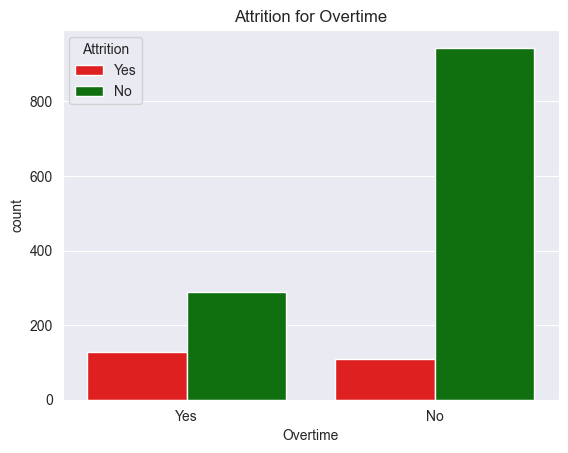

In [ ]:
sns.countplot(data = df, x = 'OverTime', hue = 'Attrition', palette = {'Yes': 'red', 'No': 'green'})
plt.title('Attrition for Overtime')
plt.xlabel('Overtime')

In [ ]:
overtime = df.groupby(['OverTime', 'Attrition']).size().reset_index(name = 'Count')
overtime_totals = df.groupby('OverTime').size()
overtime["Attrition percentage for overtime"] = overtime.apply(lambda row: (row["Count"] / overtime_totals[row["OverTime"]]) * 100, axis=1)
overtime = overtime[overtime['Attrition'] == 'Yes']
overtime = overtime.sort_values(by = 'Attrition percentage for overtime', ascending = False)
overtime = overtime.style.hide(axis ='index')
overtime

OverTime,Attrition,Count,Attrition percentage for overtime
Yes,Yes,127,30.528846
No,Yes,110,10.436433


There is a vast difference in attrition between employees who work overtime vs those who do not. Roughly 30% of employees who said they worked overtime departing the organisation, compared to just 10% of employees who did not work overtime.

<br><br>

#### The impact of Distance From Home on Attrition

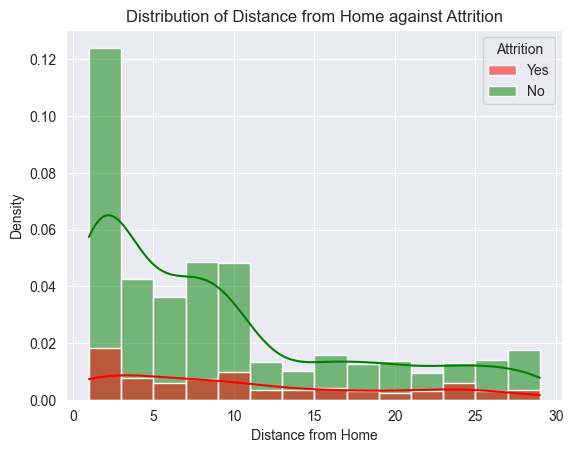

In [ ]:
sns.histplot(data= df, x= "DistanceFromHome", hue= "Attrition", stat = 'density', kde = 'True', palette = {'Yes': 'red', 'No': 'green'})
plt.title("Distribution of Distance from Home against Attrition")
plt.xlabel("Distance from Home")
plt.ylabel("Density")
plt.show()

There does not seem to be a noticable relationship that can be observed from this relationship between distance from home and attrition. There is a slightly higher rate of attrition noticed in those that are closer to the workspace, it is not a large difference, and this could be attributed to external factors.

<br><br>

#### The impact of Training time on attrition

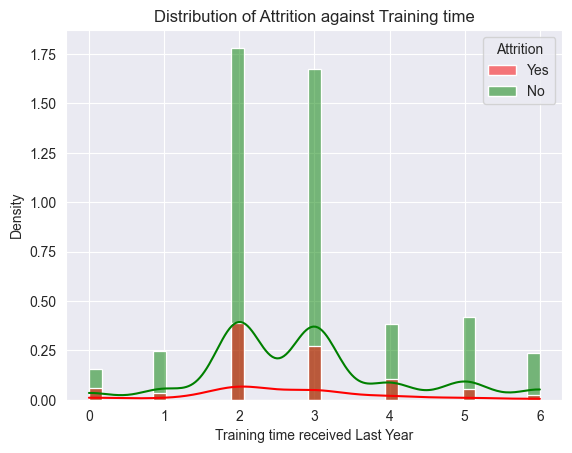

In [ ]:
sns.histplot(data= df, x= "TrainingTimesLastYear", hue= "Attrition", stat = 'density', kde = 'True', palette = {'Yes': 'red', 'No': 'green'})
plt.title("Distribution of Attrition against Training time")
plt.xlabel("Training time received Last Year")
plt.ylabel("Density")
plt.show()

In [ ]:
training = df.groupby(['TrainingTimesLastYear', 'Attrition']).size().reset_index(name = 'Count')
training_totals = df.groupby('TrainingTimesLastYear').size()
training["Percentage of Training time"] = training.apply(lambda row: (row["Count"] / training_totals[row["TrainingTimesLastYear"]]) * 100, axis=1)
training = training[training['Attrition'] == 'Yes']
training = training.sort_values(by = 'Percentage of Training time', ascending = False)
training = training.style.hide(axis ='index')
training

TrainingTimesLastYear,Attrition,Count,Percentage of Training time
0,Yes,15,27.777778
4,Yes,26,21.138211
2,Yes,98,17.915905
3,Yes,69,14.052953
1,Yes,9,12.676056
5,Yes,14,11.764706
6,Yes,6,9.230769


Here, we show the relationship between those who are leaving the company, and the amount of training time that they received last year. We can see that the highest proportion of employees that are leaving are those received less training time compared to other employees, with the exception of category '4'. Those who received the most training times have the lowest attrition.

<br><br>